In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

np.random.seed(0)
n = 100
b_0 = 2
b_1 = 2
b_2 = 0.3

In [2]:
def cov(x, y, n):
    return (np.sum(x - np.mean(x)) * (y - np.mean(y))) / (n - 1)

In [3]:
def conduct_main_operations(X: np.array, Y: np.array):
    # fitting model
    model = LinearRegression().fit(X, Y)

    # scoring
    R_2 = model.score(X, Y)
    b_0_hat = model.intercept_
    b_1_hat = model.coef_[0]
    b_2_hat = model.coef_[1]

    if len(model.coef_) > 1:
        print(f"{R_2=}\n{b_0_hat=}\n{b_1_hat=}\n{b_2_hat=}")
    else:
        print(f"{R_2=}\n{b_0_hat=}\n{b_1_hat=}")

    print(f"b_0_hat_err={abs((b_0_hat - b_0) / b_0)}")
    print(f"b_1_hat_err={abs((b_1_hat - b_1) / b_1)}")
    print(f"b_2_hat_err={abs((b_2_hat - b_2) / b_2)}")

    return model

In [4]:
def SE_B1(x, sig_sq):
    mean = x.mean()
    denominator = np.sum((x - mean) ** 2)
    return math.sqrt(sig_sq / denominator)

In [5]:
x_1 = np.random.uniform(0, 1, 100)
x_2 = 0.5 * x_1 + np.random.normal(0, 1, 100) / 10
y = 2 + 2 * x_1 + 0.3 * x_2 + np.random.normal(0, 1, 100)

$y = 2 + 2 \cdot x_1 + 0.3 \cdot x_2 + \epsilon$

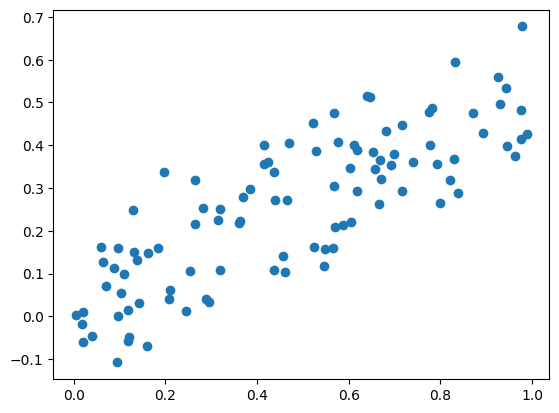

In [6]:
plt.scatter(x_1, x_2)

In [7]:
np.corrcoef(x_1, x_2)

array([[1.        , 0.81926336],
       [0.81926336, 1.        ]])

In [8]:
req = conduct_main_operations(X=np.array([x_1, x_2]).reshape((-1, 2)), Y=y)

R_2=0.0012562108636452463
b_0_hat=2.8166435103917333
b_1_hat=0.00038677133760382294
b_2_hat=0.1536623066984185
b_0_hat_err=0.40832175519586666
b_1_hat_err=0.9998066143311981
b_2_hat_err=0.4877923110052717


In [9]:
y_train = y
X_train = np.array([x_1, x_2]).reshape((-1, 2))
X_train_lm = sm.add_constant(X_train)  # An intercept is not included by default and should be added by the user
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.06100
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.941
Time:                        11:42:58   Log-Likelihood:                -154.13
No. Observations:                 100   AIC:                             314.3
Df Residuals:                      97   BIC:                             322.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8166      0.244     11.531      0.0

## $x_1$ and $x_2$
We can see that p-value is very high both for $x_1$ is $0.999$ and $x_2$ is $0.729$, therefore it proofs $H_0^{(1)}$ and $H_0^{(2)}$ (?).

In [10]:
X_train = np.array(x_1).reshape((-1, 1))
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.76e-07
Time:                        11:43:06   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548      0.191     10.247      0.0

## Only $x_1$
Here p-value for $x_1$ is $0.000$, therefore we reject $H_0^{(1)}$.

In [11]:
X_train = np.array(x_2).reshape((-1, 1))
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           4.29e-07
Time:                        11:43:06   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721      0.178     11.623      0.0

## Only $x_2$
Here p-value for $x_2$ is $0.000$, therefore we reject $H_0^{(2)}$.

## Mismeasurement

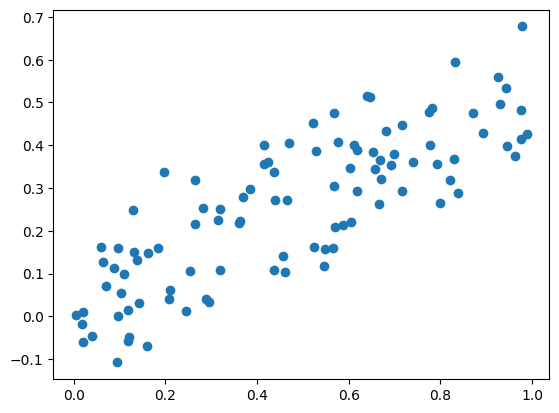

In [19]:
mismeasured_x_1 = np.append(x_1, 0.1)
mismeasured_x_2 = np.append(x_2, 0.8)
mismeasured_y = np.append(y, 6)

In [17]:
X_train = np.array([mismeasured_x_1, mismeasured_x_2]).reshape((-1, 2))
X_train_lm = sm.add_constant(X_train)  # An intercept is not included by default and should be added by the user
lm = sm.OLS(mismeasured_y, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.02894
Date:                Tue, 29 Nov 2022   Prob (F-statistic):              0.971
Time:                        11:57:10   Log-Likelihood:                -158.89
No. Observations:                 101   AIC:                             323.8
Df Residuals:                      98   BIC:                             331.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8717      0.252     11.385      0.0

In [14]:
X_train = np.array(mismeasured_x_1).reshape((-1, 1))
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(mismeasured_y, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     23.57
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.50e-06
Time:                        11:55:43   Log-Likelihood:                -148.13
No. Observations:                 101   AIC:                             300.3
Df Residuals:                      99   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.201     10.315      0.0

In [15]:
X_train = np.array(mismeasured_x_2).reshape((-1, 1))
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(mismeasured_y, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.88
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.33e-08
Time:                        11:55:44   Log-Likelihood:                -142.93
No. Observations:                 101   AIC:                             289.9
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0255      0.176     11.531      0.0

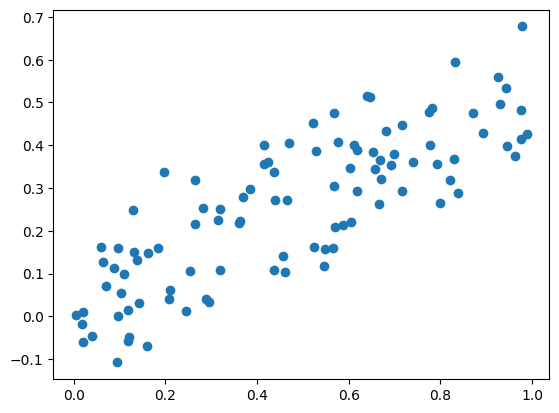

In [21]:
plt.scatter(x_1, x_2)

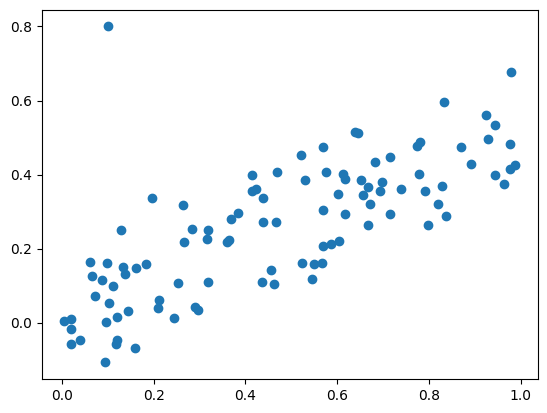

In [22]:
plt.scatter(mismeasured_x_1, mismeasured_x_2)

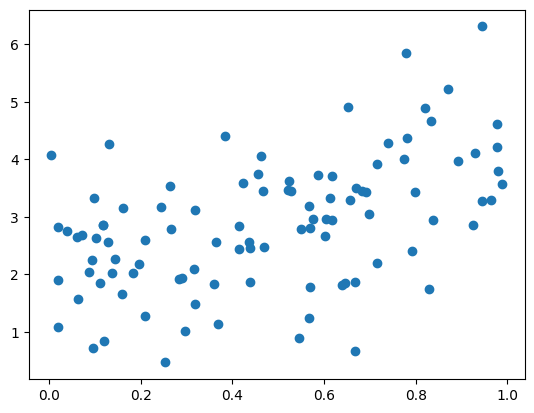

In [26]:
plt.scatter(x_1, y)

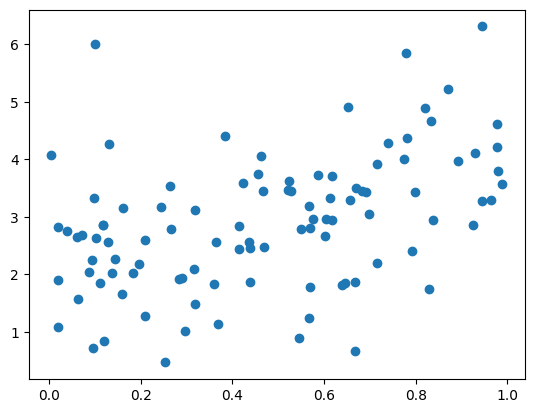

In [25]:
plt.scatter(mismeasured_x_1, mismeasured_y)